# **Automatidata**


# **Exploratory data analysis**


**The purpose** of this project is to conduct exploratory data analysis on a provided data set.
  
**The goal** is to clean data set and create a visualization.

*This Notebook has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results


# **PACE stages**


## **PACE: Plan**





Consider these questions:

1. Identify any outliers:


*   What methods are best for identifying outliers?
  * Use numpy functions to investigate the `mean()` and `median()` of the data and understand range of data values
  * Use a boxplot to visualize the distribution of the data
  * Use histograms to visualize the distribution of the data
*   How do you make the decision to keep or exclude outliers from any future models?
  * There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make taking into account the nature of the outlying data and the assumptions of the model you are building. To help you make the decision, you can start with these general guidelines:

      * Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
      * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
      * Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

### Task 1. Imports, links, and loading



In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path_main = '/content/drive/MyDrive/Data Analytics/Main Projects/Automatidata project/2017_Yellow_Taxi_Trip_Data.csv'

In [5]:
df = pd.read_csv(file_path_main)

## **PACE: Analyze**

### Task 2a. Data exploration and cleaning

Deciding which columns are applicable.


Discovering dataframe information:

In [6]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [7]:
df.size

408582

In [8]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Task 2b. Select visualization type(s)

Selecting data visualization types that will help you understand and explain the data.



* A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of `trip_distance`, `duration`, and `total_amount`.

* A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as `trip_distance` and `total_amount`.

* A bar chart will help determine average number of trips per month, weekday, weekend, etc.

## PACE: Construct


### Task 3. Data visualization


### Boxplots

Converting date columns to datetime in order to derive total trip duration:

In [10]:
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

**trip distance**

Trip distance median: 1.61


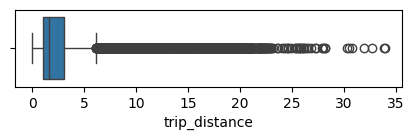

In [11]:
print(f"Trip distance median: {df['trip_distance'].median()}")
plt.figure(figsize=(5,1))
sns.boxplot(x=df["trip_distance"])
plt.show()

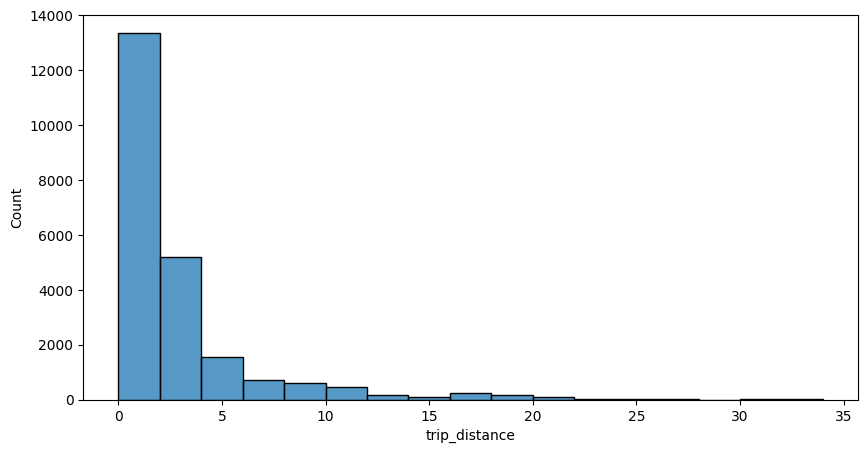

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df["trip_distance"],bins=range(0,36,2))
plt.show()

* The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

**total amount**

Total amount median: 11.8


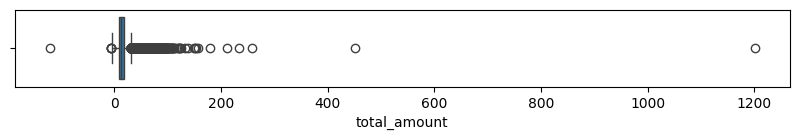

In [13]:
print(f"Total amount median: {df['total_amount'].median()}")
plt.figure(figsize=(10,1))
sns.boxplot(x=df["total_amount"])
plt.show()

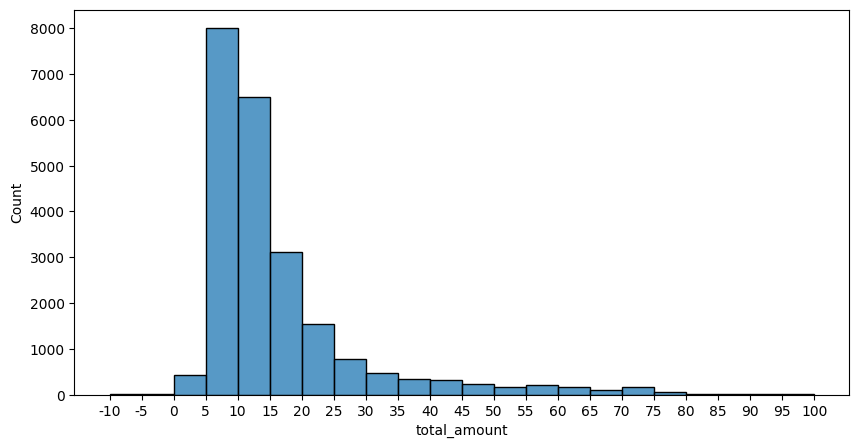

In [14]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.show()

* The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

**tip amount**

Tip amount median: 1.35


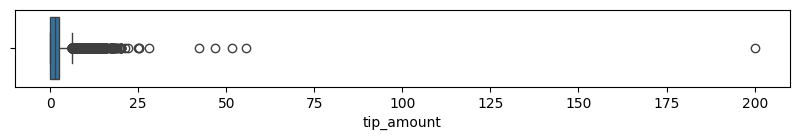

In [15]:
print(f"Tip amount median: {df['tip_amount'].median()}")
plt.figure(figsize=(10,1))
sns.boxplot(x=df["tip_amount"])
plt.show()

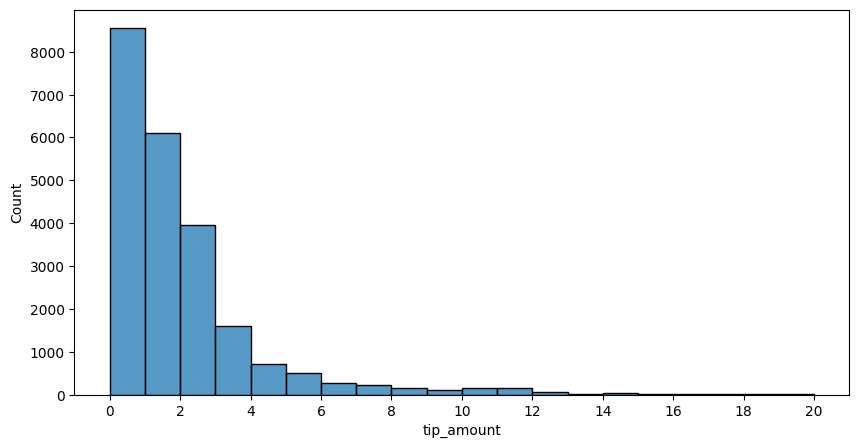

In [16]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.show()

* The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

**tip_amount by vendor**

In [20]:
df["VendorID"].value_counts()

2    12626
1    10073
Name: VendorID, dtype: int64

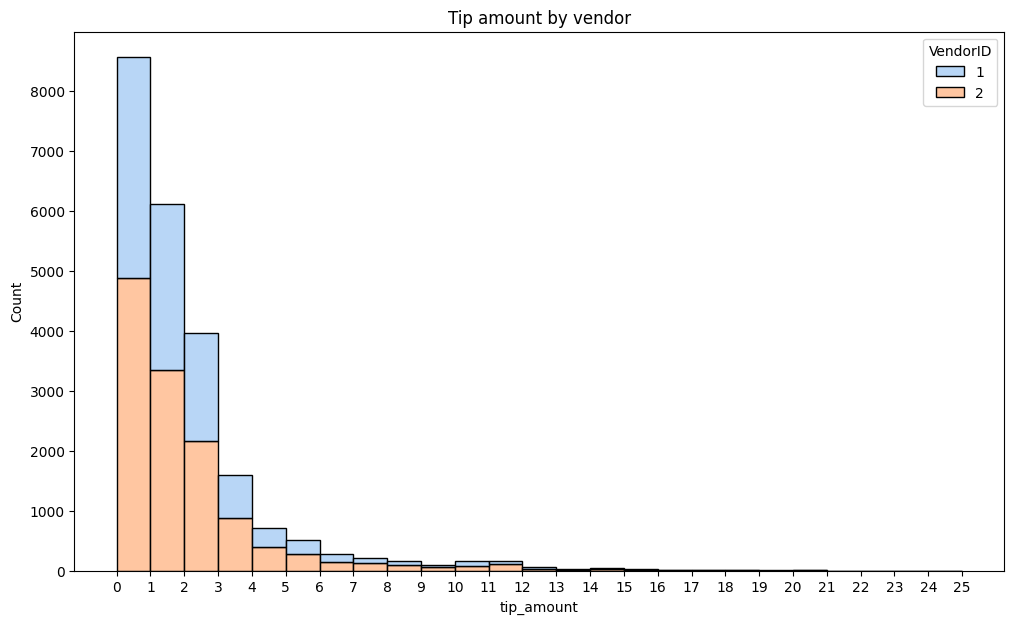

In [19]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df,x="tip_amount",hue="VendorID",multiple="stack",bins=range(0,26,1),palette="pastel")
ax.set_xticks(range(0,26,1))
ax.set_xticklabels(range(0,26,1))
plt.title("Tip amount by vendor")
plt.show()

* Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Zooming in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips (`tip_amount` by vendor for tips > $10):

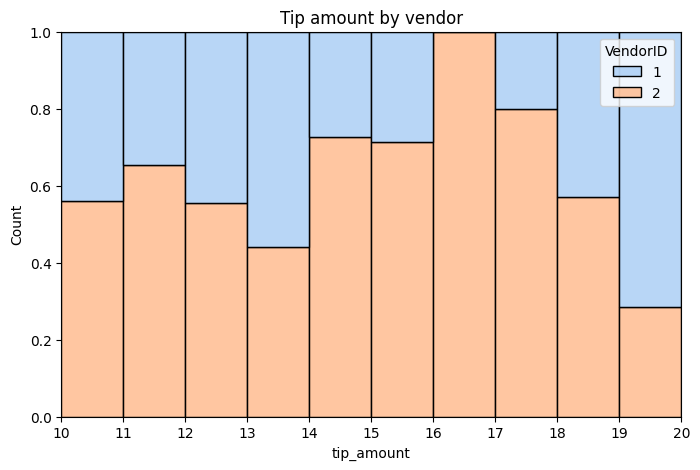

In [26]:
df_tips_10 = df[df["tip_amount"]>10]
plt.figure(figsize=(8,5))
ax = sns.histplot(data=df_tips_10,x="tip_amount",hue="VendorID",multiple="fill",bins=range(10,21,1),palette="pastel")
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title("Tip amount by vendor")
plt.show()

* The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

**Mean tips by passenger count**

Examining the unique values in the `passenger_count` column:

In [27]:
df["passenger_count"].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [28]:
df["passenger_count"].value_counts(normalize = True)

1    0.710031
2    0.145601
5    0.050355
3    0.041984
6    0.030530
4    0.020045
0    0.001454
Name: passenger_count, dtype: float64

* 71% of the rides were single occupancy, though there were still nearly 700 (3%) rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

Calculating mean tips by passenger_count:

In [91]:
def round_2f(value):
  return round(value,2)

In [92]:
tips_by_pssngr_count = df.groupby(["passenger_count"])["tip_amount"].mean().reset_index().rename(columns={"tip_amount":"mean_tip_amount"})[1:]
tips_by_pssngr_count["mean_tip_amount"] = tips_by_pssngr_count["mean_tip_amount"].apply(round_2f)
tips_by_pssngr_count

,passenger_count,mean_tip_amount
1,1,1.85
2,2,1.86
3,3,1.72
4,4,1.53
5,5,1.87
6,6,1.72


Creating bar plot for mean tips by passenger count:

In [103]:
fig = px.bar(tips_by_pssngr_count, x='passenger_count', y='mean_tip_amount', title="Mean tip amount by passenger count")
fig.add_hline(y=df['tip_amount'].mean(), line_dash="dash", line_color="red", annotation_text=f"Global Mean: {df['tip_amount'].mean():.2f}", annotation_position="bottom right")
fig.update_layout(xaxis_title="Passenger Count", yaxis_title="Mean Tip Amount")
fig.update_yaxes(range=[1.5, 1.9])
fig.show()

* Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

**Create month and day columns**

In [105]:
df["month"] = df["tpep_pickup_datetime"].dt.month_name()

df["day"] = df["tpep_pickup_datetime"].dt.day_name()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


**Plotting total ride count by month**

Calculating total ride count by month:

In [107]:
monthly_rides = df["month"].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

Reordering the results to put the months in calendar order:

In [108]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

In [109]:
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

Creating a bar plot of total rides per month:

In [115]:
fig = px.bar(x=monthly_rides.index, y=monthly_rides.values, title="Total rides per month")
fig.add_hline(y=monthly_rides.values.mean(), line_dash="dash", line_color="red", annotation_text=f"Global Mean: {monthly_rides.values.mean():.2f}", annotation_position="top right")
fig.update_layout(xaxis_title="Month", yaxis_title="Rides")
fig.update_yaxes(range=[1000, 2200])
fig.show()

* Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**Plotting total ride count by day**

Repeating the above process, but now calculating the total rides by day of the week:

In [116]:
daily_rides = df["day"].value_counts()
days = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
daily_rides = daily_rides.reindex(index=days)
daily_rides

Sunday       2998
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Name: day, dtype: int64

In [118]:
fig = px.bar(x=daily_rides.index, y=daily_rides.values, title="Total rides by day")
fig.add_hline(y=daily_rides.values.mean(), line_dash="dash", line_color="red", annotation_text=f"Global Mean: {daily_rides.values.mean():.2f}", annotation_position="top right")
fig.update_layout(xaxis_title="Day", yaxis_title="Rides")
fig.update_yaxes(range=[2000, 3500])
fig.show()

* Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

**Plotting total revenue by day of the week**

Repeating the above process, but now calculating the total revenue by day of the week:

In [119]:
daily_revenue = df.groupby(["day"])["total_amount"].sum()
daily_revenue = daily_revenue.reindex(index=days)
daily_revenue

day
Sunday       48624.06
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Name: total_amount, dtype: float64

In [129]:
fig = px.bar(x=daily_revenue.index, y=daily_revenue.values, title="Total revenue by day")
fig.add_hline(y=daily_revenue.values.mean(), line_dash="dash", line_color="red", annotation_text=f"Global Mean: {daily_revenue.values.mean():_.2f}", annotation_position="top right")
fig.update_layout(xaxis_title="Day", yaxis_title="Revenue")
fig.update_yaxes(range=[40000, 60000])
fig.show()

* Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's&mdash;more than a 10% drop.

**Plotting total revenue by month**

In [126]:
monthly_revenue = df.groupby(["month"])["total_amount"].sum()
monthly_revenue = monthly_revenue.reindex(index=month_order)
monthly_revenue

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

In [128]:
fig = px.bar(x=monthly_revenue.index, y=monthly_revenue.values, title="Total revenue by month")
fig.add_hline(y=monthly_revenue.values.mean(), line_dash="dash", line_color="red", annotation_text=f"Global Mean: {monthly_revenue.values.mean():_.2f}", annotation_position="top right")
fig.update_layout(xaxis_title="Month", yaxis_title="Revenue")
fig.update_yaxes(range=[20000, 35000])
fig.show()

* Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

#### Scatter plot

**Plotting mean trip distance by drop-off location**

In [130]:
df["DOLocationID"].nunique()

216

Calculating the mean trip distance for each drop-off location:

In [131]:
drop_off_mean_trip_distance = df.groupby(["DOLocationID"])["trip_distance"].mean().reset_index(name='mean_trip_distance')
drop_off_mean_trip_distance = drop_off_mean_trip_distance.sort_values(by="mean_trip_distance", ascending=True)
drop_off_mean_trip_distance.reset_index(drop=True, inplace=True)
drop_off_mean_trip_distance.head()

,DOLocationID,mean_trip_distance
0,207,1.200000
1,193,1.390556
2,237,1.555494
3,234,1.727806
4,137,1.818852


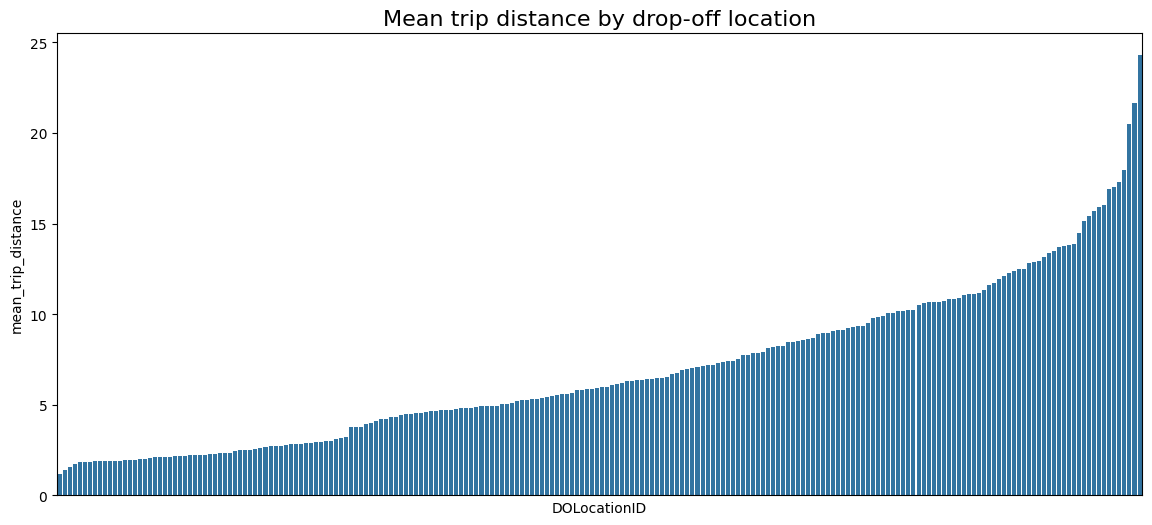

In [132]:
plt.figure(figsize=(14,6))
x = drop_off_mean_trip_distance["DOLocationID"]
y = drop_off_mean_trip_distance["mean_trip_distance"]
ax = sns.barplot(x=x,y=y,order=x)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16)
plt.show()

* This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations.


To confirm the conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

In [147]:
s = np.array([[2,16],[4,3]])
e = np.array([[5,6],[8,8]])


In [148]:
x =(s-e)**2
x

array([[  9, 100],
       [ 16,  25]])

In [152]:
x.sum(axis=1), x.sum(axis=-1)

(array([109,  41]), array([109,  41]))

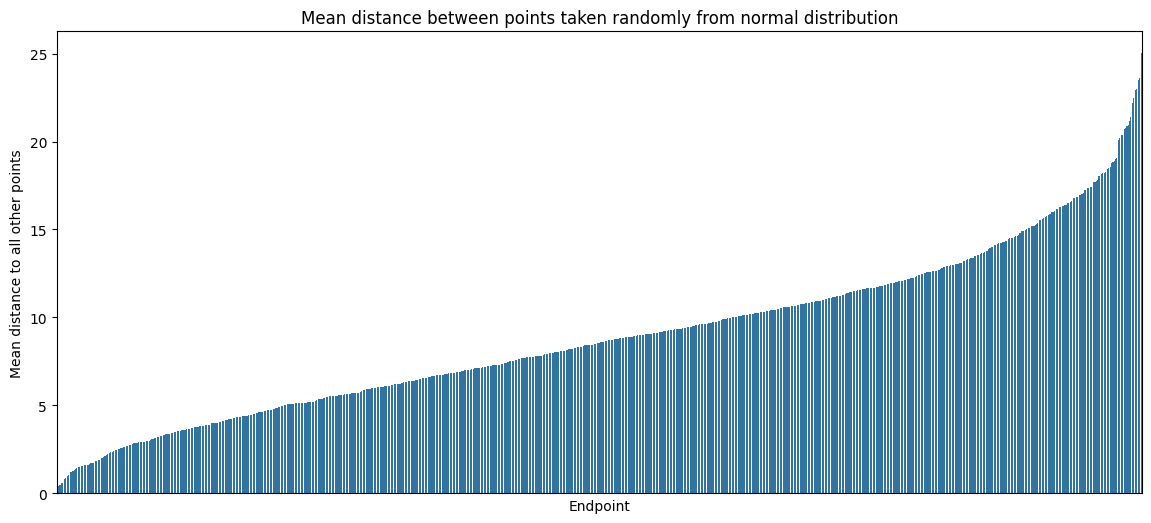

In [156]:
#1. Generating random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)),1)
midway = int(len(test)/2)
start = test[:midway]
end = test[midway:]

# 2. Calculating Euclidean distances between points in first half and second half of array
distances = (start - end)**2
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Groupping the coordinates by "drop-off location", computing mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df.groupby(["end"])["distance"].mean().reset_index().sort_values(by="distance")

# 4. Plotting the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14,6))
x = [str(endpoint) for endpoint in data["end"]]
y = data["distance"]
ax = sns.barplot(x=x,y=y,order=x)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution')
plt.show()

* The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. Note, however, that this does *not* mean that there was an even distrubtion of *rides* to each drop-off point. Examine this next.


**Histogram of rides by drop-off location**

First, checking whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location:

In [157]:
df["DOLocationID"].max() - len(set(df["DOLocationID"]))

49

In [174]:
df["DOLocationID"].value_counts()

161    858
236    802
230    761
237    759
170    699
      ... 
219      1
18       1
31       1
147      1
201      1
Name: DOLocationID, Length: 216, dtype: int64

* There are 49 numbers that do not represent a drop-off location.

To eliminate the spaces in the historgram that these missing numbers would create, we'll sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other:

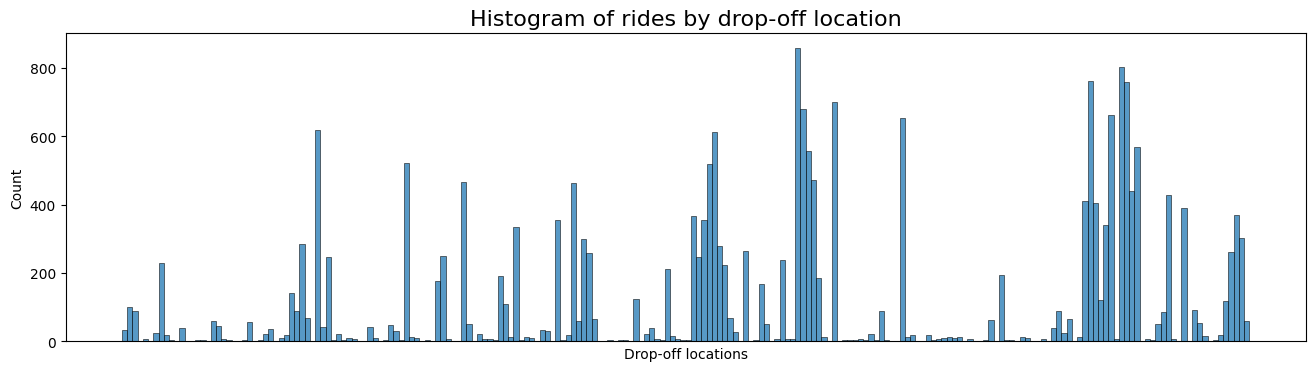

In [181]:
sorted_drop_offs = df["DOLocationID"].sort_values()
sorted_drop_offs = sorted_drop_offs.astype("str")

plt.figure(figsize=(16,4))
sns.histplot(sorted_drop_offs, bins=range(0, df["DOLocationID"].max(), 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

* Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

## PACE: Execute


### Task 4a. Results and evaluation



I have learned .... the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values.

My other questions are .... There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model?

My client would likely want to know ... that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model.


In [182]:
df["trip_duration"] =  df["tpep_dropoff_datetime"] -df["tpep_pickup_datetime"]

In [183]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43


### Task 4b. Conclusion



Insights:

EDA is important because ...

* *EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.*

Visualizations helped me understand ..

* *That this dataset has some outliers that we will need to make decisions on prior to designing a model.*
